# Import libraries and data

In this section, we import the necessary libraries and load the data. We will also create a lookup table that stores the relationship between the material, sample number, and the file path to the corresponding CSV file.


In [136]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Specify the parent directory
parent_directory = os.path.expanduser("~/git_repo/materials_comparison/data")

# Create a lookup table (DataFrame) to store the relationship between the material, sample number, and file path
lookup_table = pd.DataFrame(columns=['Material', 'Sample_Number', 'File_Path'])

#define constant dimensions of the sample
sample_length = 8 #mm
sample_width = 3 #mm

# Iterate over each material folder in the parent directory
for material_folder in os.listdir(parent_directory):
    material = material_folder.lower()  # Convert to lowercase
    material_path = os.path.join(parent_directory, material_folder)

    # Check if the path is a directory
    if os.path.isdir(material_path):
        # Iterate over each sample folder in the material folder
        for sample_folder in os.listdir(material_path):
            sample_number = sample_folder.replace('Ecoflex', '').lower()  # Convert to lowercase
            sample_path = os.path.join(material_path, sample_folder)

            # Find the CSV file in the sample folder
            for file in os.listdir(sample_path):
                if file.endswith(".csv") and "Data" in file:
                    file_path = os.path.join(sample_path, file)
                    # Append the information to the lookup table
                    row_df = pd.DataFrame([{'Material': material, 'Sample_Number': sample_number, 'File_Path': file_path}])
                    lookup_table = pd.concat([lookup_table, row_df], ignore_index=True)

lookup_table


,Material,Sample_Number,File_Path
0,pure gel,132,/home/trevor/git_repo/materials_comparison/dat...
1,pure gel,130,/home/trevor/git_repo/materials_comparison/dat...
2,pure gel,131,/home/trevor/git_repo/materials_comparison/dat...
3,pure gel,134,/home/trevor/git_repo/materials_comparison/dat...
4,pure gel,133,/home/trevor/git_repo/materials_comparison/dat...
5,gel-dragon-soma,108,/home/trevor/git_repo/materials_comparison/dat...
6,gel-dragon-soma,114,/home/trevor/git_repo/materials_comparison/dat...
7,gel-dragon-soma,109,/home/trevor/git_repo/materials_comparison/dat...
8,gel-dragon-soma,113,/home/trevor/git_repo/materials_comparison/dat...
9,gel-dragon-soma,111,/home/trevor/git_repo/materials_comparison/dat...


In [137]:
import pandas as pd
import numpy as np
import os

# Specify the parent directory and Excel file path
parent_directory = os.path.expanduser("~/git_repo/materials_comparison/data")
xlsx_file_path = os.path.join(parent_directory, "Thickness of Silicone Dog Bone Samples.xlsx")

# Read the Excel file into a pandas DataFrame
thickness_df = pd.read_excel(xlsx_file_path, header=None)

# Initialize a dictionary to hold DataFrames for each material
material_dfs = {}

# Initialize a variable to hold the current material
current_material = None

# Initialize an empty DataFrame to hold the sample data for the current material
current_df = pd.DataFrame()

# Iterate over the DataFrame
for _, row in thickness_df.iterrows():
    # Check if the current row represents a material header
    if pd.isna(row[1]) and isinstance(row[0], str):
        # If this is not the first material, add the previous DataFrame to the dictionary
        if not current_df.empty:
            material_dfs[current_material] = current_df

        # Update the current material and initialize a new DataFrame
        current_material = row[0].lower()  # Convert to lowercase
        current_df = pd.DataFrame(columns=['Sample', 'Thickness'])

    # Check if the current row represents sample data
    elif isinstance(row[0], str) and not pd.isna(row[1]):
        # Extract the sample number and thickness
        sample_number = row[0].split('-')[0].replace('Ecoflex', '').zfill(3)
        thickness = row[1]

        # Append the data to the current DataFrame
        current_df = pd.concat([current_df, pd.DataFrame({'Sample': [sample_number], 'Thickness': [thickness]})], ignore_index=True)

# Don't forget to add the last material's DataFrame to the dictionary
if not current_df.empty:
    material_dfs[current_material] = current_df

# Concatenate the DataFrames in the dictionary into a single DataFrame
thickness_df = pd.concat(material_dfs, names=['Material', 'Index'])

# Reset the index
thickness_df.reset_index(level=0, inplace=True)

# Now, thickness_df should be in the desired format
thickness_df


,Material,Sample,Thickness
Index,,,
0,dragon-sil,076,2.90
1,dragon-sil,077,2.85
2,dragon-sil,078,2.80
3,dragon-sil,079,2.86
4,dragon-sil,080,2.80
0,sil-eco-gel,081,2.88
1,sil-eco-gel,082,2.89
2,sil-eco-gel,083,2.87
3,sil-eco-gel,084,2.98


# Function: get_sample_info

The function get_sample_info is designed to retrieve and display information about a specific sample based on its sample number.
Parameters

The function takes two parameters:

    sample_number: The sample number as a string. For example, '001'.
    lookup_table: A pandas DataFrame that serves as a lookup table mapping material names to sample numbers and file paths.

## Process

The function begins by filtering the lookup table for the specific sample number. If no data is found for the given sample number, the function prints a message indicating this and returns None.

If data is found for the sample number, the function retrieves the material name and file path associated with the sample. It then reads the data from the file path into a DataFrame, stripping any leading or trailing spaces from the column names.
Output

The function prints the material group that the sample number belongs to and the DataFrame for this sample. It then returns the material name and DataFrame. If no data is found for the given sample number, the function returns None.
Example Usage


>get_sample_info('001', lookup_table)

This function call will print the material group that sample number '001' belongs to, display the DataFrame for this sample, and return the material name and DataFrame.

In [138]:
def get_sample_info(sample_number, lookup_table):
    # Filter the lookup table for the specific sample number
    sample_data = lookup_table[lookup_table['Sample_Number'] == sample_number]

    if len(sample_data) == 0:
        print(f"No data found for sample number {sample_number}.")
        return None

    material = sample_data['Material'].iloc[0]
    file_path = sample_data['File_Path'].iloc[0]

    df = pd.read_csv(file_path)  # Read in the data
    df.columns = df.columns.str.strip()  # Strip leading and trailing spaces from column names

    print(f"Sample number {sample_number} belongs to the material group: {material}")
    print("Here's the DataFrame for this sample:")
    print(df)

    return material, df

get_sample_info('134', lookup_table)



Sample number 134 belongs to the material group: pure gel
Here's the DataFrame for this sample:
                  SetName      Cycle  Time_S  Size_mm  Displacement_mm  \
0   Elongation till break  1-Preload    0.00   48.000            0.000   
1   Elongation till break  1-Preload    0.20   48.000            0.000   
2   Elongation till break  1-Preload    0.40   48.000            0.000   
3   Elongation till break  1-Stretch    0.41   48.000            0.000   
4   Elongation till break  1-Stretch    0.61   48.402            0.402   
5   Elongation till break  1-Stretch    0.81   48.883            0.883   
6   Elongation till break  1-Stretch    1.01   49.364            1.364   
7   Elongation till break  1-Stretch    1.21   49.845            1.845   
8   Elongation till break  1-Stretch    1.41   50.326            2.326   
9   Elongation till break  1-Stretch    1.61   50.807            2.807   
10  Elongation till break  1-Stretch    1.81   51.289            3.289   
11  Elongation t

('pure gel',
                   SetName      Cycle  Time_S  Size_mm  Displacement_mm  \
 0   Elongation till break  1-Preload    0.00   48.000            0.000   
 1   Elongation till break  1-Preload    0.20   48.000            0.000   
 2   Elongation till break  1-Preload    0.40   48.000            0.000   
 3   Elongation till break  1-Stretch    0.41   48.000            0.000   
 4   Elongation till break  1-Stretch    0.61   48.402            0.402   
 5   Elongation till break  1-Stretch    0.81   48.883            0.883   
 6   Elongation till break  1-Stretch    1.01   49.364            1.364   
 7   Elongation till break  1-Stretch    1.21   49.845            1.845   
 8   Elongation till break  1-Stretch    1.41   50.326            2.326   
 9   Elongation till break  1-Stretch    1.61   50.807            2.807   
 10  Elongation till break  1-Stretch    1.81   51.289            3.289   
 11  Elongation till break  1-Stretch    2.01   51.770            3.770   
 12  Elongat

# Process data based on sample number

In this section, we define a function that processes and plots the dataframes for a given material. The function reads in the data for each sample, appends the dataframe to the appropriate group in the groups dictionary, and plots the results.


In [139]:
gel_eco_thickness_data = thickness_df[thickness_df['Material'] == 'gel-eco']
print(gel_eco_thickness_data)


      Material Sample  Thickness
Index                           
0      gel-eco   125        2.68
1      gel-eco   126        2.56
2      gel-eco   127        2.73
3      gel-eco   128        2.57
4      gel-eco   129        2.60


The Young's Modulus for sample number 125 is 0.2358720111533765 MPa
Plotting the curves for material: gel-eco, sample number: 125
The Young's Modulus for sample number 129 is 0.26978312692598405 MPa
Plotting the curves for material: gel-eco, sample number: 129
The Young's Modulus for sample number 128 is 0.24497480020902523 MPa
Plotting the curves for material: gel-eco, sample number: 128
The Young's Modulus for sample number 126 is 0.2706151637917123 MPa
Plotting the curves for material: gel-eco, sample number: 126
The Young's Modulus for sample number 127 is 0.20982510589107395 MPa
Plotting the curves for material: gel-eco, sample number: 127


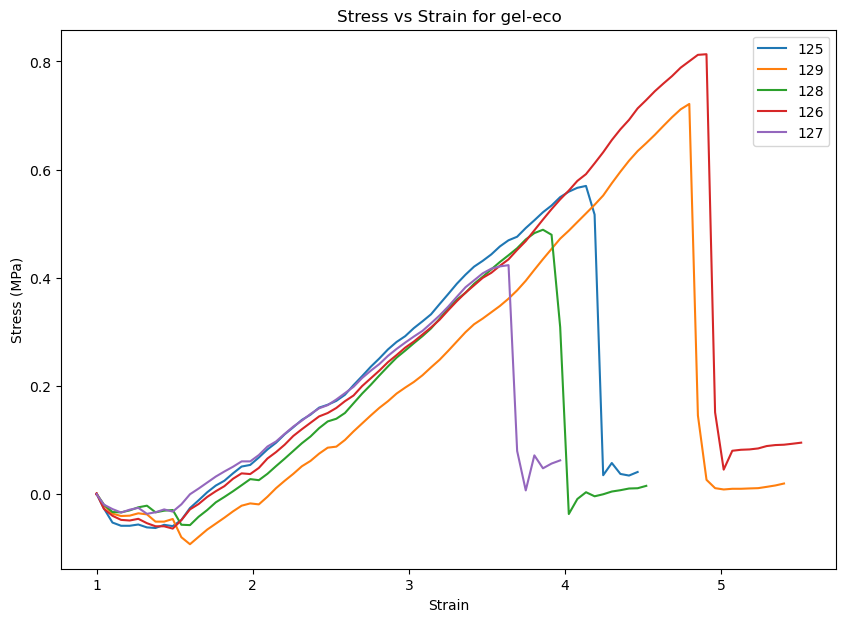

The mean Young's Modulus for material gel-eco is 0.24621404159423443 MPa
The standard deviation of Young's Modulus for material gel-eco is 0.022731319813555643 MPa


In [140]:
import numpy as np  # For mean and standard deviation calculations

def process_and_plot_dataframes(material, lookup_table, thickness_df):
    # Filter the lookup table for the specific material
    material_data = lookup_table[lookup_table['Material'] == material]

    # Strip any potential leading/trailing spaces from the 'Sample' column in the thickness dataframe
    thickness_df['Sample'] = thickness_df['Sample'].str.strip()

    # Create figure objects for each plot
    fig_force_displacement = plt.figure(figsize=(10, 7))
    ax_force_displacement = fig_force_displacement.add_subplot(111)

    youngs_modulus_list = []  # This will store Young's modulus for each sample

    # Loop over the rows in the filtered lookup table
    for _, row in material_data.iterrows():
        sample_number = row['Sample_Number']
        sample_number_str = str(sample_number).zfill(3)  # Create a string version with leading zeros
        file_path = row['File_Path']

        # Use sample_number_str for filtering
        sample_thickness = thickness_df[(thickness_df['Material'] == material) & 
                                        (thickness_df['Sample'] == sample_number_str)]['Thickness'].values[0]

        df = pd.read_csv(file_path)  # Read in the data
        df.columns = df.columns.str.strip()  # Strip leading and trailing spaces from column names

        df["Stress (MPa)"] = df["Force_N"] / (sample_thickness * sample_width)  # Calculate the stress
        df["Strain"] = (sample_length + df["Displacement_mm"]) / sample_length  # Calculate the strain

        #Calculate Young's Modulus and add to list
        max_stress_index = df['Stress (MPa)'].idxmax()
        max_stress = df['Stress (MPa)'].max()
        strain_at_max_stress = df['Strain'][max_stress_index]
        strain_at_50_percent_stress = strain_at_max_stress / 2
        index_at_50_percent_stress = df['Strain'].sub(strain_at_50_percent_stress).abs().idxmin()
        stress_at_50_percent_stress = df['Stress (MPa)'][index_at_50_percent_stress]
        youngs_modulus = (max_stress - stress_at_50_percent_stress) / (strain_at_max_stress - strain_at_50_percent_stress)
        youngs_modulus_list.append(youngs_modulus)

        print(f"The Young's Modulus for sample number {sample_number} is {youngs_modulus} MPa")

        # Print a description for the curve
        print(f"Plotting the curves for material: {material}, sample number: {sample_number}")

        # Stress vs Strain plot
        ax_force_displacement.plot(df['Strain'].values, df['Stress (MPa)'].values, label=sample_number)

    ax_force_displacement.set_xlabel('Strain')
    ax_force_displacement.set_ylabel('Stress (MPa)')
    ax_force_displacement.set_title(f'Stress vs Strain for {material}')
    ax_force_displacement.legend()

    # Show the plots
    plt.show()

    # Calculate mean and standard deviation of Young's modulus across all samples
    youngs_modulus_mean = np.mean(youngs_modulus_list)
    youngs_modulus_std = np.std(youngs_modulus_list)
    print(f"The mean Young's Modulus for material {material} is {youngs_modulus_mean} MPa")
    print(f"The standard deviation of Young's Modulus for material {material} is {youngs_modulus_std} MPa")

# Call the function with specific material names and the lookup table
process_and_plot_dataframes('gel-eco', lookup_table, thickness_df)


The Young's Modulus for sample number 125 is 0.2358720111533765 MPa
Plotting the curves for material: gel-eco, sample number: 125
The Young's Modulus for sample number 129 is 0.26978312692598405 MPa
Plotting the curves for material: gel-eco, sample number: 129
The Young's Modulus for sample number 128 is 0.24497480020902523 MPa
Plotting the curves for material: gel-eco, sample number: 128
The Young's Modulus for sample number 126 is 0.2706151637917123 MPa
Plotting the curves for material: gel-eco, sample number: 126
The Young's Modulus for sample number 127 is 0.20982510589107395 MPa
Plotting the curves for material: gel-eco, sample number: 127


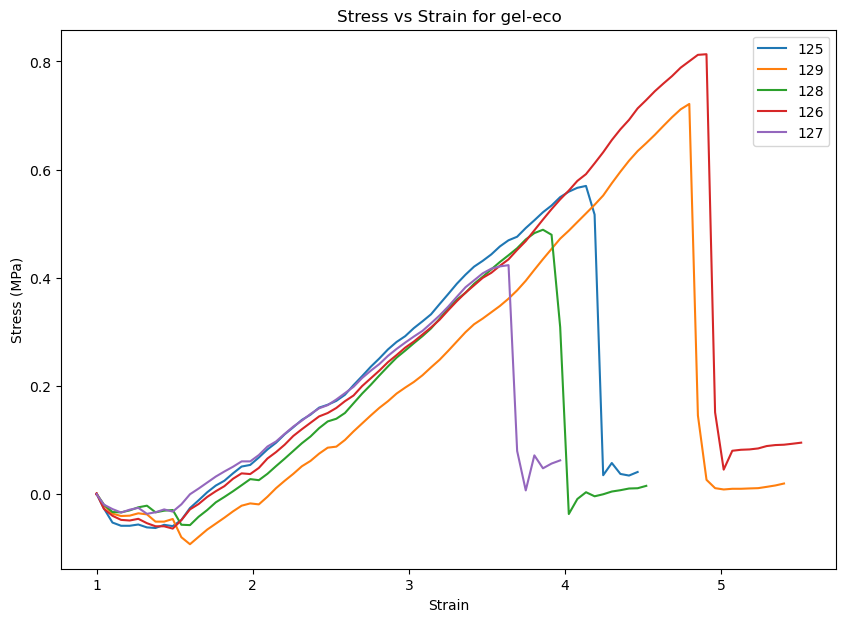

The mean Young's Modulus for material gel-eco is 0.24621404159423443 MPa
The standard deviation of Young's Modulus for material gel-eco is 0.022731319813555643 MPa
The Young's Modulus for sample number 108 is 0.33762594248348565 MPa
Plotting the curves for material: gel-dragon-soma, sample number: 108
The Young's Modulus for sample number 114 is 0.4255874215273193 MPa
Plotting the curves for material: gel-dragon-soma, sample number: 114
The Young's Modulus for sample number 109 is 0.3847348053169032 MPa
Plotting the curves for material: gel-dragon-soma, sample number: 109
The Young's Modulus for sample number 113 is 0.3989229563915854 MPa
Plotting the curves for material: gel-dragon-soma, sample number: 113
The Young's Modulus for sample number 111 is 0.3529242005127963 MPa
Plotting the curves for material: gel-dragon-soma, sample number: 111
The Young's Modulus for sample number 112 is 0.45753951786320596 MPa
Plotting the curves for material: gel-dragon-soma, sample number: 112
The Yo

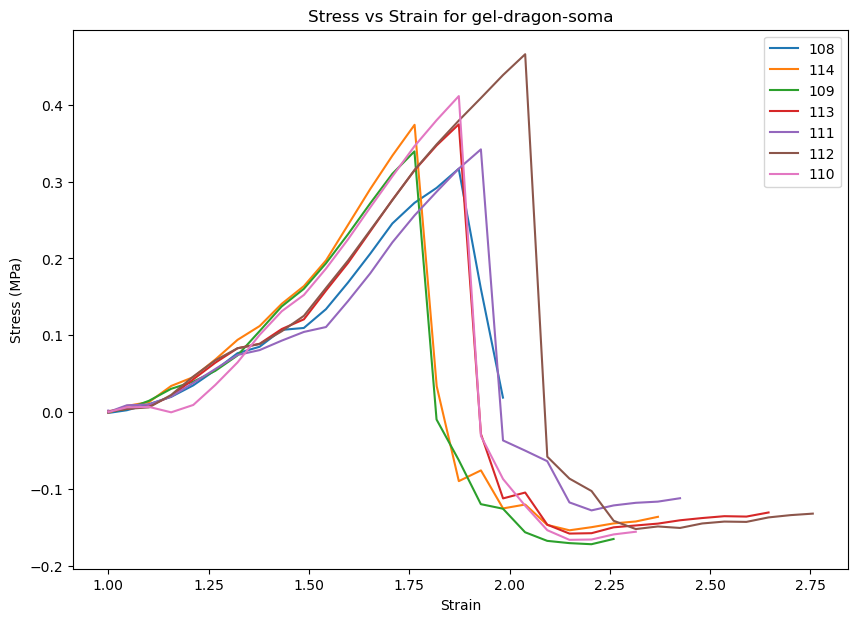

The mean Young's Modulus for material gel-dragon-soma is 0.39944823506779076 MPa
The standard deviation of Young's Modulus for material gel-dragon-soma is 0.04107463360330596 MPa
The Young's Modulus for sample number 117 is 0.39065058230899724 MPa
Plotting the curves for material: soma-eco, sample number: 117
The Young's Modulus for sample number 119 is 0.3471557870452389 MPa
Plotting the curves for material: soma-eco, sample number: 119
The Young's Modulus for sample number 116 is 0.3824089130905826 MPa
Plotting the curves for material: soma-eco, sample number: 116
The Young's Modulus for sample number 118 is 0.39540082861382503 MPa
Plotting the curves for material: soma-eco, sample number: 118
The Young's Modulus for sample number 115 is 0.2623457704389874 MPa
Plotting the curves for material: soma-eco, sample number: 115


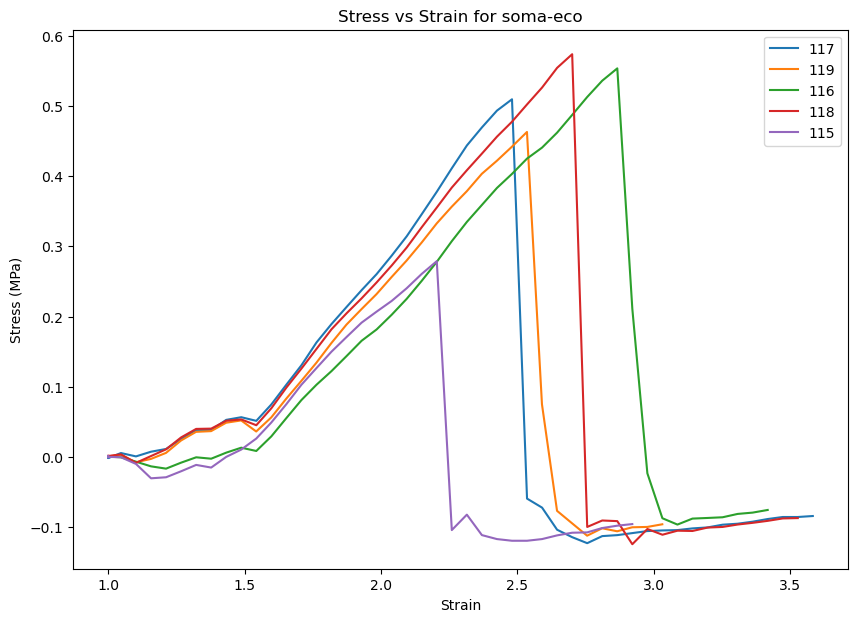

The mean Young's Modulus for material soma-eco is 0.3555923762995262 MPa
The standard deviation of Young's Modulus for material soma-eco is 0.049596416952204576 MPa
The Young's Modulus for sample number 132 is 0.11376998392124858 MPa
Plotting the curves for material: pure gel, sample number: 132
The Young's Modulus for sample number 130 is 0.0013333333333333333 MPa
Plotting the curves for material: pure gel, sample number: 130
The Young's Modulus for sample number 131 is 0.10600182000251299 MPa
Plotting the curves for material: pure gel, sample number: 131
The Young's Modulus for sample number 134 is 0.13064128890139712 MPa
Plotting the curves for material: pure gel, sample number: 134
The Young's Modulus for sample number 133 is 0.10420868629823854 MPa
Plotting the curves for material: pure gel, sample number: 133


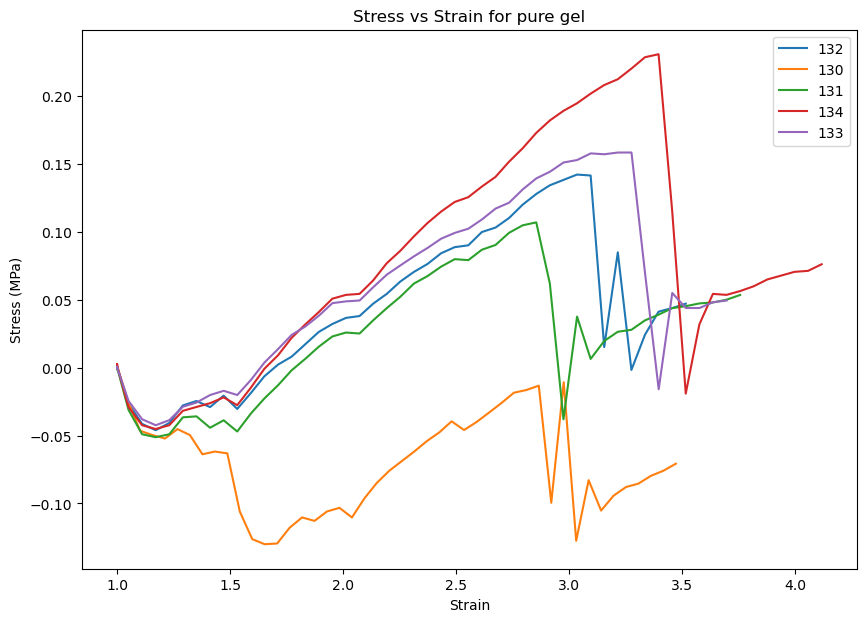

The mean Young's Modulus for material pure gel is 0.09119102249134611 MPa
The standard deviation of Young's Modulus for material pure gel is 0.045889773618533206 MPa
The Young's Modulus for sample number 123 is 0.3244436780937661 MPa
Plotting the curves for material: dragon-gel, sample number: 123
The Young's Modulus for sample number 122 is 0.2875987293058722 MPa
Plotting the curves for material: dragon-gel, sample number: 122
The Young's Modulus for sample number 120 is 0.3708039565683141 MPa
Plotting the curves for material: dragon-gel, sample number: 120
The Young's Modulus for sample number 121 is 0.2855768607352925 MPa
Plotting the curves for material: dragon-gel, sample number: 121
The Young's Modulus for sample number 124 is 0.30275940045749217 MPa
Plotting the curves for material: dragon-gel, sample number: 124


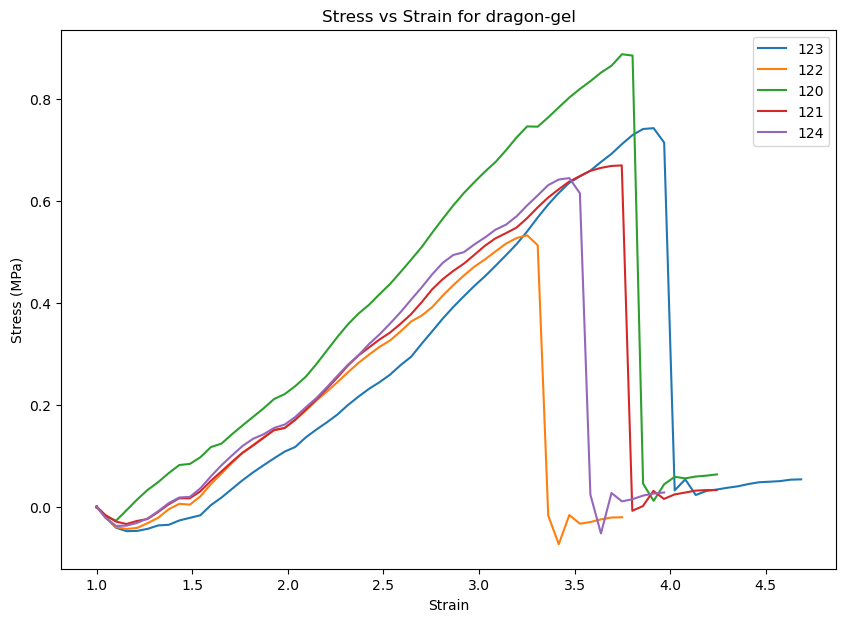

The mean Young's Modulus for material dragon-gel is 0.31423652503214744 MPa
The standard deviation of Young's Modulus for material dragon-gel is 0.031517402150201275 MPa


IndexError: index 0 is out of bounds for axis 0 with size 0

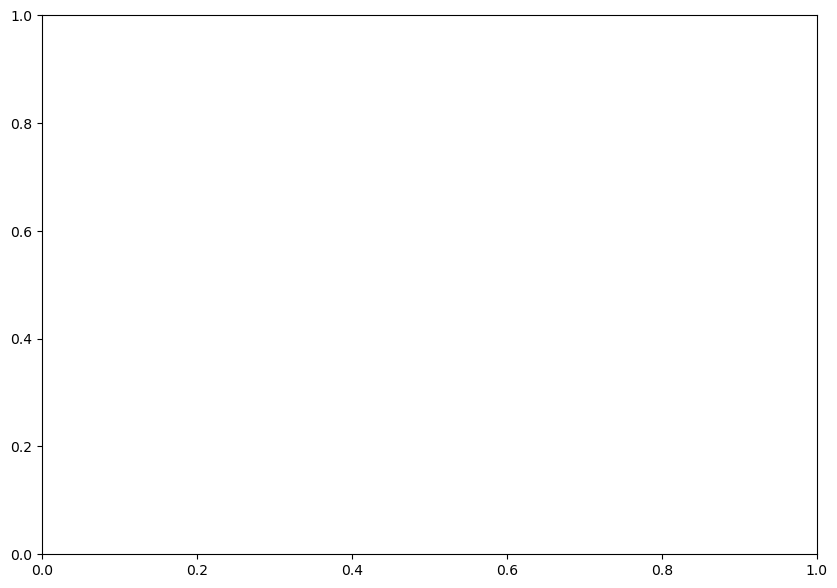

In [141]:
# Call the function with specific material names and the lookup table
process_and_plot_dataframes('gel-eco', lookup_table, thickness_df)
process_and_plot_dataframes('gel-dragon-soma', lookup_table, thickness_df)
process_and_plot_dataframes('soma-eco', lookup_table, thickness_df)
process_and_plot_dataframes('pure gel', lookup_table, thickness_df)
process_and_plot_dataframes('dragon-gel', lookup_table, thickness_df)
process_and_plot_dataframes('sil-eco', lookup_table, thickness_df)